Step1:

Business Requirenment

We are trying to build a model which detect the each category of images in fashion world

Objective:

If any women like blue dress so we will target the different blue dresses to her with may be different texture ,different material and so on.



The dataset which we are using that is called fashion MNIST dataset and we are having 10 target class which we will get after classifying the image category like Ankle boot, sneakers etc.

Our Fashion Dataset :
    1. fashion dataset contains 28*28 gray scale images with values ranging from 0-255
    2.'0' represents black adn 1 represents the white
    3.Each image is representing by a row and 784 (i.e. 28*28 )values

Fashion training set consists 70,000 images divided into 60,000 training and 10,000 testing samples. Datset sample consist of 28*28 grayscale images, associated with a labels with 10 classes 

The 10 classes  are as follows
0=>T-shirt/top 1=>Trouser 2=>Pullover 3=>Dress 4=>Coat 5=>Sandal 6=>Shirt 7=>Sneakers 8=>Bag 9=>Ankle boat

Each image is 28 pixel in height and 28 pixel in width. Each pixel has a single pixel-value associated with it,indictaing the lightness or darkness of that pixel with higher number meaning darkness

### Step 2: Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observation:

Each rows represents the images in pixel.

In [3]:
test_data = pd.read_csv('fashion-mnist_test.csv')
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 3 : Visualization of dataset

In [4]:
train_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
train_data.shape

(60000, 785)

In [7]:
test_data.shape

(10000, 785)

In [8]:
training = np.array(train_data,dtype='float32')

In [9]:
testing = np.array(test_data,dtype='float32')

In [10]:
import random
i = random.randint(1,60000)

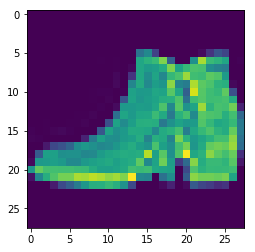

In [11]:
plt.imshow(training[i,1:].reshape(28,28))

In [12]:
label = training[i,0]
label

9.0

In [13]:
#Remember the 10 classes decoding as follows
# 0 => T-shirt/Top
# 1 => Trouser
# 2=> Pullover
# 3=> Dress
# 4=>Coat
# 5 = > Sandal
# 6 =>Shirt
# 7 = >Sneaker
# 8=> Bag
# 9 = >Ankle Boat

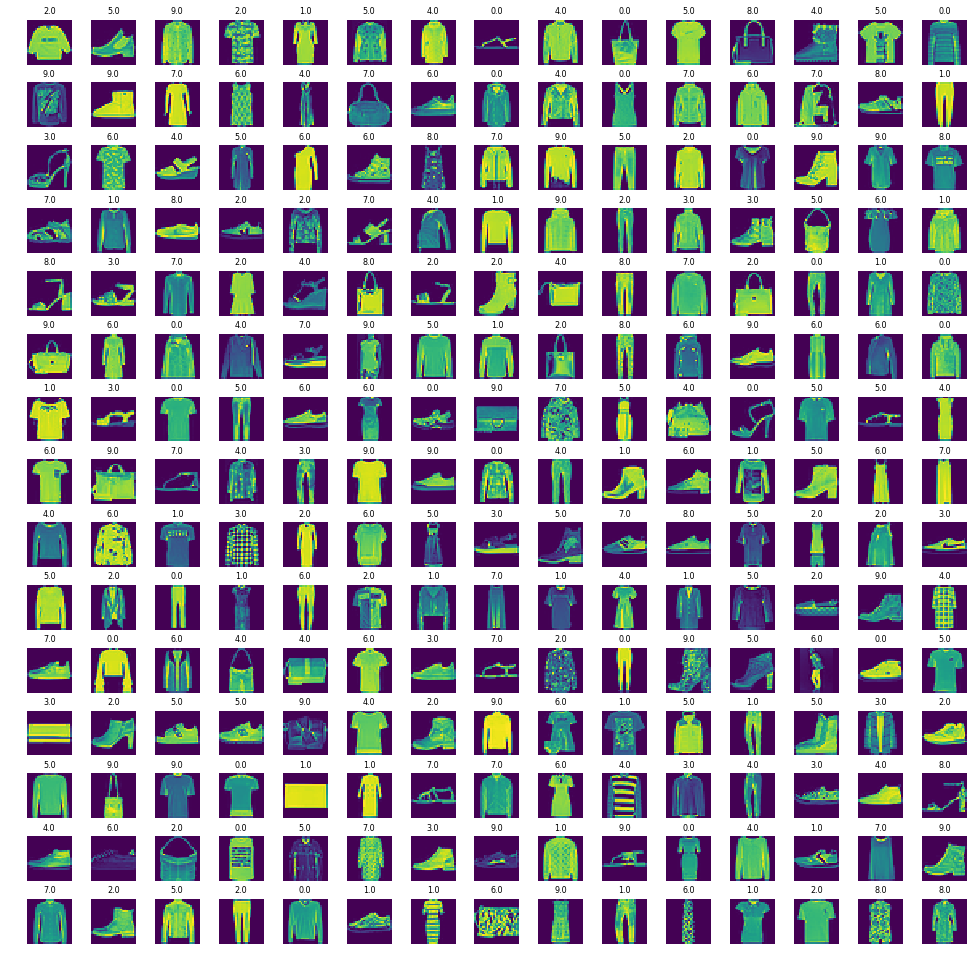

In [14]:
# let's view more images in a grid format
#define the dimensions of plot grid
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))
axes = axes.ravel() #flatten the 17 * 17 matrix into 255 array
n_training = len(training)#get the length of training dataset
#select  the random number from 0 to n_training

for i in np.arange(0,W_grid*L_grid):
    #create evenly space variable
    #slect a random variable
    index = np.random.randint(0,n_training)
    #read and display an image with selected index
    axes[i].imshow(training[i,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

### CNN :  
When we deal with images we need to preserve or called as special dependent on pixels .So if we take a bag all the pixels are dependent other pixel around it that' why  we need to perform kind of another option before actually we feed the pixel directly our network we want to perform called convolution that's where the CNN came into play  

### Step 4 :Training The model

In [16]:
X_train = training[:, 1:]/255 # we are taking all row except one c0lumn that is target and we normalize it
Y_train = training[:,0] # actually need column number 0

In [17]:
X_test = testing[:, 1:]/255 # we are taking all row except one clumn that is target and we normalize it
Y_test = testing[:,0] # actually need column number 0

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_validate,Y_train,Y_validate = train_test_split(X_train,Y_train,test_size = 0.2, random_state = 5 )

In [20]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [21]:
X_train.shape

(48000, 28, 28, 1)

We are having 48000 sample and each of them 28 by 28 by 1.Baiscally it is gray scale image 28 by 28

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
X_validate.shape

(12000, 28, 28, 1)

In [24]:
import warnings
warnings.filterwarnings("ignore")
import keras

Using TensorFlow backend.


In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam # we import the Adam optimizer
from keras.callbacks import TensorBoard

We used the sequential to build the network followed by maxpooling,dropout,flatten and dense(fully connected network) and we used tensorboard for callbacks

In [26]:
import warnings
warnings.filterwarnings("ignore")
# To build our model kind of Sequential form
cnn_model = Sequential() # we call the Sequential and then we start building on top of that
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu')) # going to add Convolution Layer first
#we specified the 32 kernal with size 3 by 3.input shape (28,28,1) it is size about image then specify the relu activation 
#function

In [27]:
import warnings
warnings.filterwarnings("ignore")
#Going to specify the maxpooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [28]:
cnn_model.add(Flatten())

In [29]:
cnn_model.add(Dense(output_dim=32,activation ='relu'))

In [30]:
cnn_model.add(Dense(output_dim = 10,activation = 'sigmoid'))

In [31]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics = ['accuracy'])

In [32]:
epochs = 50

In [33]:
cnn_model.fit(X_train,Y_train,batch_size=512,nb_epoch = epochs,verbose=1,validation_data=(X_validate,Y_validate))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 376us/step - loss: 1.0315 - acc: 0.5988 - val_loss: 0.5359 - val_acc: 0.8105
Epoch 2/50
48000/48000 [==============================] - 17s 363us/step - loss: 0.4704 - acc: 0.8349 - val_loss: 0.4427 - val_acc: 0.8472
Epoch 3/50
48000/48000 [==============================] - 17s 362us/step - loss: 0.4123 - acc: 0.8568 - val_loss: 0.4135 - val_acc: 0.8522
Epoch 4/50
48000/48000 [==============================] - 17s 362us/step - loss: 0.3813 - acc: 0.8678 - val_loss: 0.3894 - val_acc: 0.8653
Epoch 5/50
48000/48000 [==============================] - 17s 360us/step - loss: 0.3607 - acc: 0.8753 - val_loss: 0.3656 - val_acc: 0.8729
Epoch 6/50
48000/48000 [==============================] - 17s 361us/step - loss: 0.3503 - acc: 0.8783 - val_loss: 0.3623 - val_acc: 0.8724
Epoch 7/50
48000/4800

when epoch number is increasing accuracy is also increasing 

### Step 5 : Evaluting the model

In [35]:
evaluation = cnn_model.evaluate(X_test,Y_test)
print("Test Accuracy : {:3f}".format(evaluation[1]))

10000/10000 [==============================] - 2s 169us/step
Test Accuracy : 0.912300


In [36]:
predicted_class = cnn_model.predict_classes(X_test)

In [37]:
predicted_class

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

I am having 0 to 8 classes

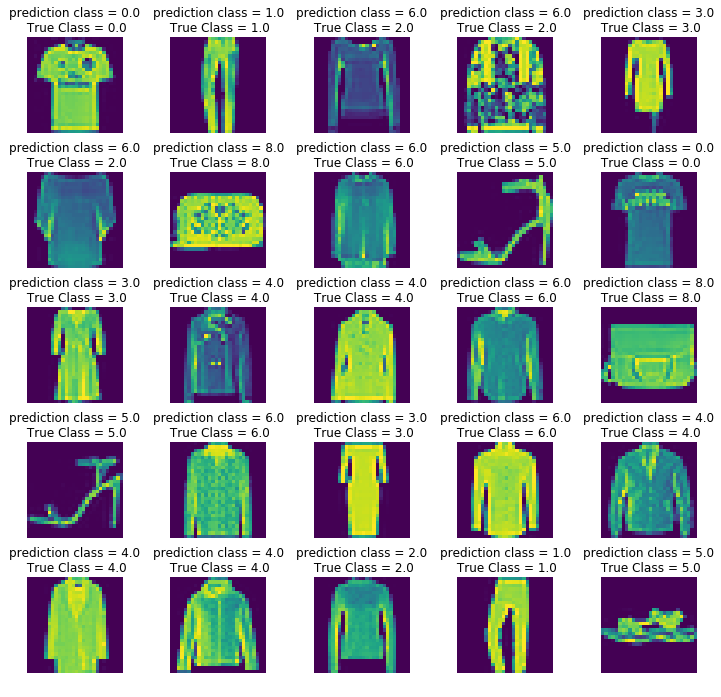

In [41]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()#
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("prediction class = {:0.1f}\n True Class = {:0.1f}".format(predicted_class[i],Y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=0.5)

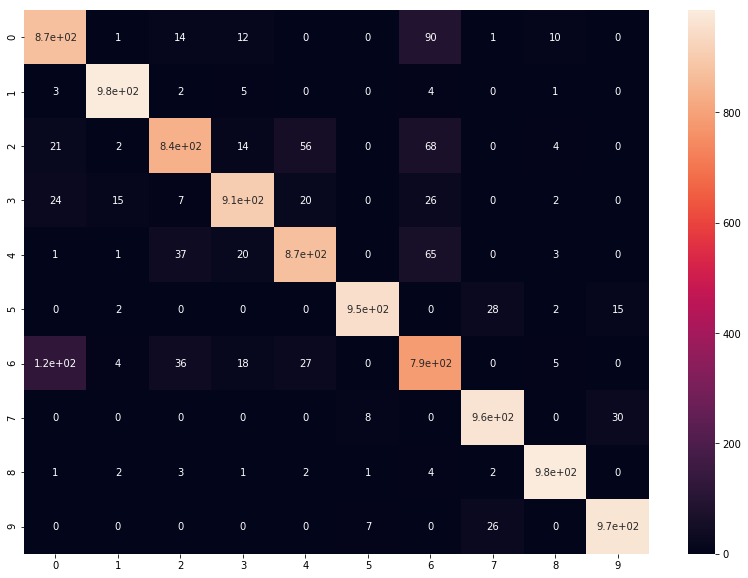

In [43]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(Y_test,predicted_class)
plt.figure(figsize=(14,10))
sns.heatmap(cn,annot=True)
#we will use seaborn heatmap to show the number of sample which correctly classified and number of sample which is not correctly
#classified

In [45]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(Y_test,predicted_class,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.87      0.85      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.89      0.83      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.98      0.95      0.97      1000
     Class 6       0.75      0.79      0.77      1000
     Class 7       0.94      0.96      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#Remember the 10 classes decoding is as follows
# 0=> T-shirt/Top
# 1=> Trouser
# 2=>Pullover
# 3=> Dress
# 4=> Coat
# 5=> Sandal
# 6=> Shirt
# 7=> Sneaker
# 8=> Bag
# 9=> Ankle boot

We found that sandal is classfied correctly. We can see sandal properly. Sneaker ,Bag we can see properly

### Improving the Model

We can improve the model by adding kernal or adding a dropout(Dropout is regularization technique for reducing the overfitting
in neural networks)